# Projeto House Rocket

Metodo Crisp

# Imports

In [159]:
import pandas as  pd
import numpy as np
import inflection
import math
import seaborn as sb
import random
import pickle
import warnings
import inflection
from datetime import datetime

from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder

## Helper Functions

In [160]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sb.set()

In [161]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


C:\Users\alexa\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [162]:
# Remove a exibição de notação científica
pd.set_option('float_format', '{:.2f}'.format)

In [163]:
# Arredonda duas casas decimais
pd.set_option('display.precision', 2)

## 0.2 Loading Data

In [302]:
# import dataset
data = pd.read_csv(r'C:\Users\alexa\Documents\repos\python_0_ao_ds\kc_house_data.csv')
data_raw = data.copy()

# Descrição dos dados

## Rename Columns

In [303]:
data_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [304]:
#cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
#       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
#       'CompetitionDistance', 'CompetitionOpenSinceMonth',
#       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
#       'Promo2SinceYear', 'PromoInterval']
#
## Função para alterar as letras para minusculas
#
#snakecase = lambda x: inflection.underscore (x)
#
#cols_new = list( map ( snakecase, cols_old))
#
#df1.columns = cols_new

In [305]:
df1 = data_raw

## Data Dimensions

In [306]:
print ('Number of Rows: {}' .format ( df1.shape[0]))
print ('Number of Cols: {}' .format ( df1.shape[1]))

Number of Rows: 21613
Number of Cols: 21


## Data Types

In [307]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Check NA

In [308]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Check variables

In [171]:

df1['yr_built'] = pd.to_datetime(df1['yr_built'], format = '%Y')
df1['yr_renovated'] = df1['yr_renovated'].astype(str)
df1['yr_renovated'] = df1['yr_renovated'].replace('0', '1900') # PREMISSA: quando não há reforma, ano da reforma é '1900'
df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated']).dt.strftime('%Y')
#df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format = '%Y')


In [172]:
df1['yr_renovated'] = df1['yr_renovated'].astype(str)
df1['yr_renovated'] = df1['yr_renovated'].replace('0', '1900') # PREMISSA: quando não há reforma, ano da reforma é '1900'
df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format = '%Y')

In [311]:
#transformation

#Convert variables to datetime
df1['date'] = pd.to_datetime( df1['date'], format='%Y-%m-%d' )

# Converte de 'int' para 'datetime' no formato YYYY-MM-DD
#data['yr_built'] = data['yr_built'].astype(str)
#data['yr_built'] = pd.to_datetime(data['yr_built']).dt.strftime('%Y')

df1['yr_renovated'] = df1['yr_renovated'].astype(str)
df1['yr_renovated'] = df1['yr_renovated'].replace('0', '1900') # PREMISSA: quando não há reforma, ano da reforma é '1900'
df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated']).dt.strftime('%Y')

#df = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()

# Converte do tipo float64 para int
df1['bathrooms'] = df1['bathrooms'].astype(int)
df1['floors'] = df1['floors'].astype(int)

In [312]:
df1['yr_renovated']

0        1900
1        1991
2        1900
3        1900
4        1900
5        1900
6        1900
7        1900
8        1900
9        1900
10       1900
11       1900
12       1900
13       1900
14       1900
15       1900
16       1900
17       1900
18       1900
19       1900
20       1900
21       1900
22       1900
23       1900
24       1900
25       1900
26       1900
27       1900
28       1900
29       1900
30       1900
31       1900
32       1900
33       1900
34       1900
35       2002
36       1900
37       1900
38       1900
39       1900
40       1900
41       1900
42       1900
43       1900
44       1900
45       1900
46       1900
47       1900
48       1900
49       1900
50       1900
51       1900
52       1900
53       1900
54       1900
55       1900
56       1900
57       1900
58       1900
59       1900
60       1900
61       1900
62       1900
63       1900
64       1900
65       1900
66       1900
67       1900
68       1900
69       1900
70       1900
71    

## Descriptive Statistics

In [313]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )



In [314]:
# Central Tendency - mean , median
# Dispersion - std, min, max, range, skew, kurtosis

### Numerical Atributes

In [315]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
3,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
4,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
5,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.39,127.63
6,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
7,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53
8,grade,1.00,13.00,12.00,7.66,7.00,1.18,0.77,1.19
9,sqft_above,290.00,9410.00,9120.00,1788.39,1560.00,828.07,1.45,3.40


C:\Users\alexa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

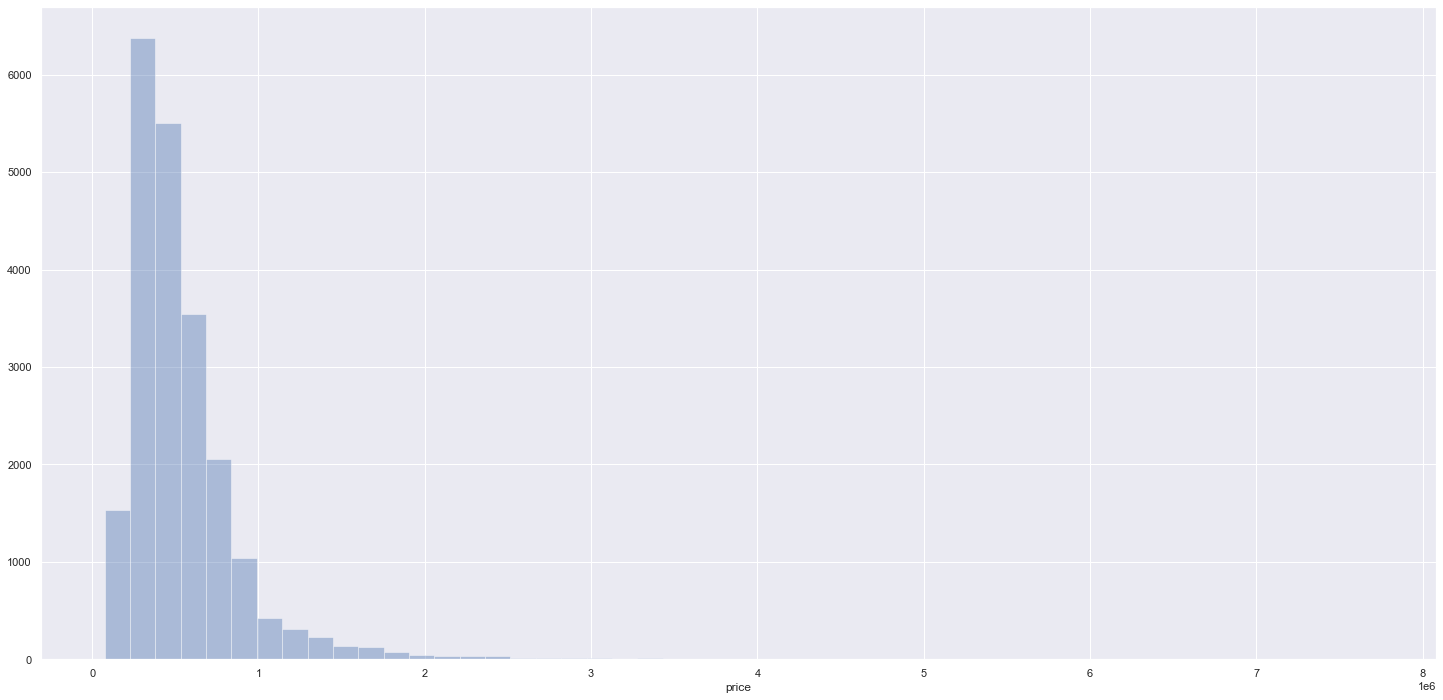

In [316]:
sb.distplot( df1['price'], kde=False )

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

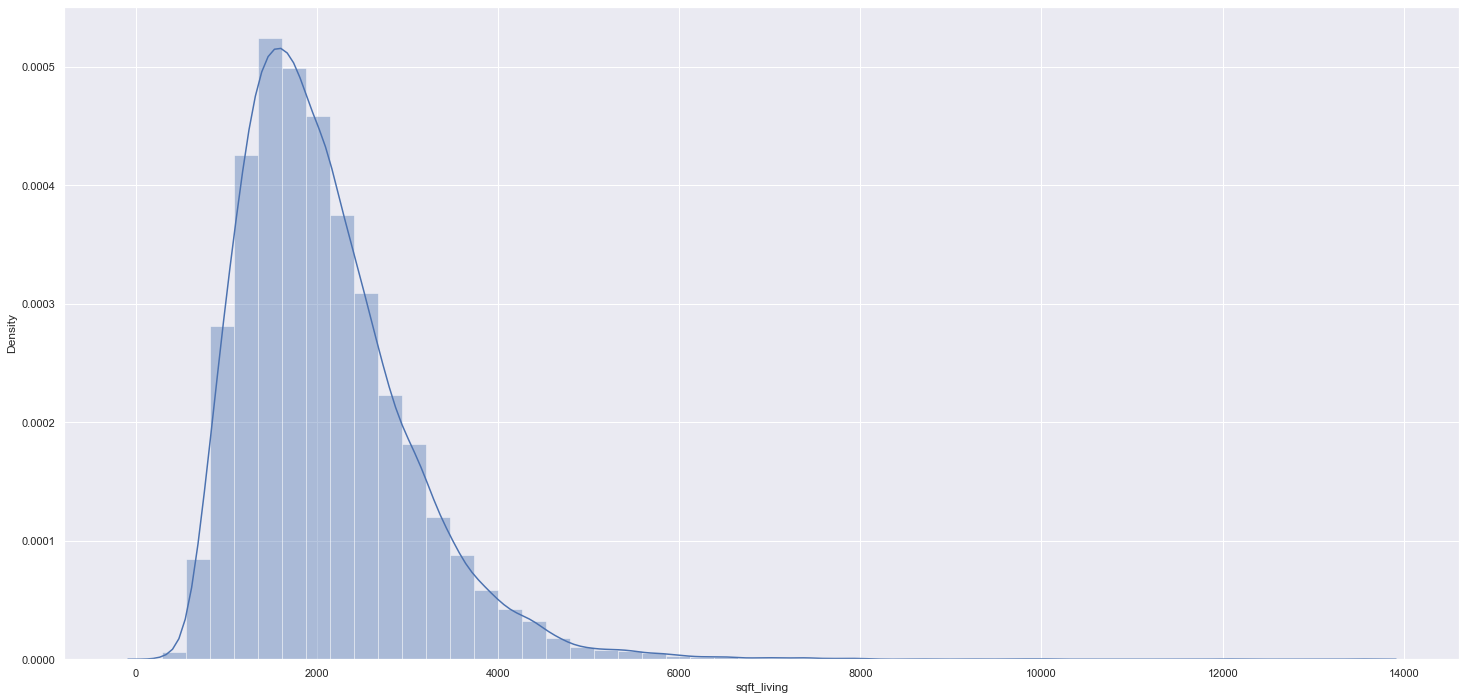

In [317]:
sb.distplot( df1['sqft_living'])

In [318]:
## sempre verificar os valores

## min, max e o range entre eles dão uma noção do atributo
## média e mediana próximas mostram que a distribuição está próxima da normal. Se estiverem distantes, temos outliers ou uma distribuição desbalanceada (poison ou outra)
## Skewness é uma métrica de simetria. quanto mais próxima de 0, mais simétrico é o dado.
## Kurtosis 

## Categorical Atributes

In [319]:
# o dataset não contém variáveis categóricas

## Identify and work with Outliers

In [320]:
num_attributes = data.select_dtypes(include=['int64', 'float64'])
maxim = pd.DataFrame(num_attributes.apply(np.max))
minim = pd.DataFrame(num_attributes.apply(np.min))
df_outlier = pd.concat([maxim, minim], axis=1).reset_index()
df_outlier.columns = ['ATTRIBUTES', 'MAX', 'MIN']
#print(df1)

In [321]:
print(df_outlier)

       ATTRIBUTES           MAX        MIN
0              id 9900000190.00 1000102.00
1           price    7700000.00   75000.00
2        bedrooms         33.00       0.00
3       bathrooms          8.00       0.00
4     sqft_living      13540.00     290.00
5        sqft_lot    1651359.00     520.00
6          floors          3.50       1.00
7      waterfront          1.00       0.00
8            view          4.00       0.00
9       condition          5.00       1.00
10          grade         13.00       1.00
11     sqft_above       9410.00     290.00
12  sqft_basement       4820.00       0.00
13       yr_built       2015.00    1900.00
14   yr_renovated       2015.00       0.00
15        zipcode      98199.00   98001.00
16            lat         47.78      47.16
17           long       -121.31    -122.52
18  sqft_living15       6210.00     399.00
19     sqft_lot15     871200.00     651.00


In [322]:
#comments

#bedrooms = 33, possível outlier




#notes:
# 33 bedrooms
# sqft loft higher than 1KK


In [323]:
df1.loc[df1['bedrooms'] == df1['bedrooms'].max(), ['id', 'bedrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']]

,id,bedrooms,sqft_lot,floors,sqft_above,sqft_basement
15870,2402100895,33,6000,1,1040,580


In [324]:
df1.loc[df1['bedrooms'] == 33, 'bedrooms'] = 3 # PREMISSA: o '33' foi erro de digitação. O correto é '3'

# Feature Engineering

## Mapa Mental de Hipóteses

### Criação das Hipóteses

In [325]:
df2 = df1

#### Hipóteses Loja

Imóveis com vista para água, na mediana, são 50% mais caros!

Casas com a data de construção igual ou menor que 1955 são mais barato que a mediana do preço.

Imóveis com a maior área total são mais caros


Imóveis com porão são mais caros, em média, do que os sem porão!

Imóveis reformados recentemente (acima de 1990) tem valor mais alto

Imóveis de 3 banheiros tem um crescimento de MoM de 15%

O crescimento do preço dos imóveis YoY é de 10%

A maioria das casas com 3 quartos são acima da mediana do preço. 

**1.**

In [339]:
# HIPÓTESE 01 - IMÓVEIS COM VISTA PARA ÁGUA SÃO 50% MAIS CARAS QUE A MEDIANA

h1 = df2[(df2['waterfront'] == 1) & (df2['price'] > df2['price'].median())]
h1['%_acima_mediana'] = ((h1['price'] / df2['price'].median()-1)*100)

print('Quantidade de casas com vista para a água : {} unidades'
      .format(len(h1)))


print('Quantidade de casas com vista para a água que não são 50% mais caras que a mediana do preço: {} unidades'
      .format(len(h1[h1['%_acima_mediana'] > 50.00])))


h1[['price', '%_acima_mediana']]

Quantidade de casas com vista para a água : 152 unidades
Quantidade de casas com vista para a água que não são 50% mais caras que a mediana do preço: 130 unidades


C:\Users\alexa\AppData\Local\Temp/ipykernel_7420/2446503442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1['%_acima_mediana'] = ((h1['price'] / df2['price'].median()-1)*100)


,price,%_acima_mediana
49,1350000.00,200.00
230,655000.00,45.56
246,2400000.00,433.33
300,3075000.00,583.33
457,705000.00,56.67
540,2125000.00,372.22
656,3070000.00,582.22
1081,825000.00,83.33
1152,1955000.00,334.44
1157,790000.00,75.56


In [327]:
# HIPÓTESE 02 - Casas com a data de construção igual ou menor que 1955 são mais barato que a mediana do preço.

In [328]:
h2 = df2

In [362]:
#h2 = df2[(df2['yr_built'] <= 1955) & (df2['price'] <= df2['price'].median())]
h2 = df2[(df2['yr_built'] <= 1955)]
h2['%_mediana'] = ((h2['price'] / df2['price'].median()-1)*100)

print('Quantidade de casas abaixo de 1955 e com preço maior que a mediana: {} unidades'
      .format(sum(h2['%_mediana'] > 0)))
print('Quantidade de casas abaixo de 1955 e com preço igual a mediana: {} unidades'
      .format(sum(h2['%_mediana'] == 0)))
print('Quantidade de casas abaixo de 1955 e com preço menor que a mediana: {} unidades'
      .format(sum(h2['%_mediana'] < 0)))

h2[['yr_built', 'price', '%_mediana']].head(10)

Quantidade de casas abaixo de 1955 e com preço maior que a mediana: 3192 unidades
Quantidade de casas abaixo de 1955 e com preço igual a mediana: 64 unidades
Quantidade de casas abaixo de 1955 e com preço menor que a mediana: 3179 unidades


C:\Users\alexa\AppData\Local\Temp/ipykernel_7420/4015138581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2['%_mediana'] = ((h2['price'] / df2['price'].median()-1)*100)


,yr_built,price,%_mediana
0,1955,221900.00,-50.69
1,1951,538000.00,19.56
2,1933,180000.00,-60.00
11,1942,468000.00,4.00
12,1927,310000.00,-31.11
14,1900,530000.00,17.78
17,1916,485000.00,7.78
18,1921,189000.00,-58.00
20,1947,385000.00,-14.44
25,1941,233000.00,-48.22


In [363]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [72]:
# -----------------------------------------------------------
# ISSO AQUI VAI VIRAR FUNÇÃO
# utilizando a função pct para mostrar a diferença %
df2['percentage_diff'] = (df2['median_price'].pct_change())*100


#### Casas com a data de construção igual ou menor que 1955 são mais baratos na média.

In [141]:
dh2 = df2[['price', 'yr_built']].copy().reset_index()
dh2.loc[dh2['yr_built'] < '1955', 'yr_built_status'] = 'before_1955'
dh2.loc[dh2['yr_built'] >= '1955', 'yr_built_status'] = 'after_1955'
data['yr_built'] = pd.to_datetime(data.yr_built, format='%Y')
print(dh2)

df['Year'] = df['Purchase Date'].dt.year

       index      price   yr_built yr_built_status
0          0  221900.00 1955-01-01      after_1955
1          1  538000.00 1951-01-01     before_1955
2          2  180000.00 1933-01-01     before_1955
3          3  604000.00 1965-01-01      after_1955
4          4  510000.00 1987-01-01      after_1955
5          5 1225000.00 2001-01-01      after_1955
6          6  257500.00 1995-01-01      after_1955
7          7  291850.00 1963-01-01      after_1955
8          8  229500.00 1960-01-01      after_1955
9          9  323000.00 2003-01-01      after_1955
10        10  662500.00 1965-01-01      after_1955
11        11  468000.00 1942-01-01     before_1955
12        12  310000.00 1927-01-01     before_1955
13        13  400000.00 1977-01-01      after_1955
14        14  530000.00 1900-01-01     before_1955
15        15  650000.00 1979-01-01      after_1955
16        16  395000.00 1994-01-01      after_1955
17        17  485000.00 1916-01-01     before_1955
18        18  189000.00 1921-01

NameError: name 'df' is not defined

#### Hipóteses Tempo

## Novas Features

In [125]:
#Houses per price level
data['level'] = data['price'].apply( lambda x: 0 if x <= 321950 else
                                               1 if  ( x > 321950 ) & ( x <= 450000) else
                                               2 if  ( x > 450000 ) & ( x <= 645000) else '3' )

data['level'] = data['level'].astype(int)

#Houses per size in meters

data['meter_living'] = data['sqft_living'] * 0.09290304
data['size'] = data['meter_living'].apply( lambda x: 0 if x <= 132.57 else
                                                    1 if  ( x > 132.57 ) & ( x <= 177.44) else
                                                    2 if  ( x > 177.44 ) & ( x <= 236.90) else '3' )

data['size'] = data['size'].astype(int)

# Calcular o preço por metro quadrado do apartamento
data['price_per_meter'] = data['price'] / data['meter_living']

#house Age
data['house_age'] = 'NA'
data.loc[data['date'] > pd.to_datetime( '2014-01-01' ), 'house_age'] = 'new_house'
data.loc[data['date'] < pd.to_datetime( '2014-01-01' ), 'house_age'] = 'old_house'

#Dormitory Type
data['dormitory_type'] = 'NA'
for i in range( len( data ) ):
    if data.loc[i, 'bedrooms'] == 1:
        data.loc[i, 'dormitory_type'] = 'studio'
        
    elif data.loc[i, 'bedrooms'] == 2:
        data.loc[i, 'dormitory_type'] = 'apartment'
    
    else:
        data.loc[i, 'dormitory_type'] = 'house'

# data dimension
print( 'Number of Rows:{}'.format( data.shape[0] ) )
print( 'Number of Columns {}'.format( data.shape[1] ) )

Number of Rows:21613
Number of Columns 28


# Análise de variaveis

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

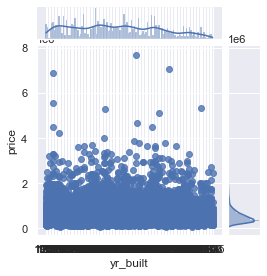

In [62]:
# Indivudal variable relationship with Price

# Linear regression between Year Built and price
sb.jointplot(x='yr_built', y='price',data=data,kind='reg',size=4)

# Linear regression between Year renovated and price
sb.jointplot(x='yr_renovated',y='price',data=data,kind='reg',size=4)


# Linear regression between Number of Bedrooms and price
sb.jointplot(x='bedrooms',y='price', data=data, kind='reg',size=4)

# Linear regression between Number of Bathrooms and price
sb.jointplot(x='bathrooms',y='price', data=data ,kind='reg',size=4)

# Linear regression between condition and price
sb.jointplot(x='condition',y='price', data=data ,kind='reg',size=4)

# Linear regression between grade and price
sb.jointplot(x='grade',y='price', data=data ,kind='reg',size=4)

<AxesSubplot:>

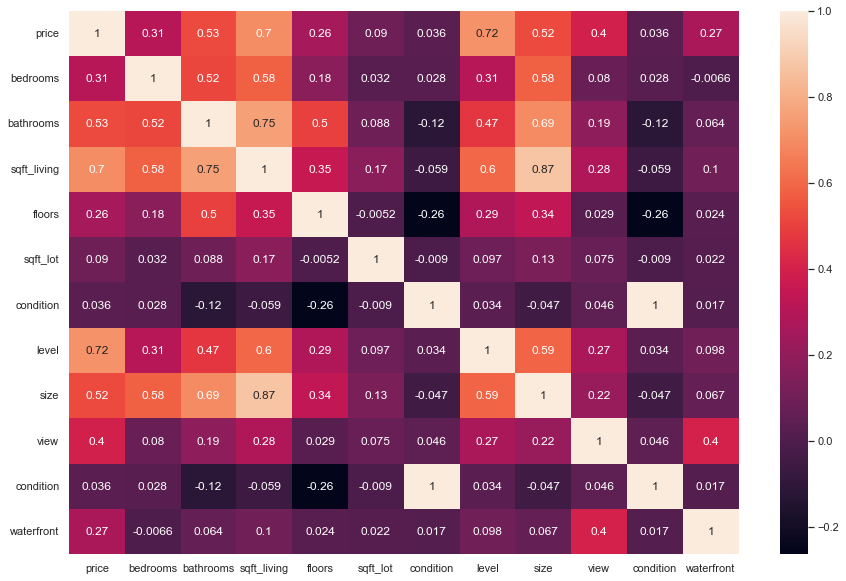

In [40]:
plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','sqft_lot','yr_built','condition','yr_renovated','level','size','house_age','dormitory_type','view','condition','waterfront']
sb.heatmap(data[columns].corr(),annot=True)

# Filtragem de Variaveis

In [41]:
df3 = data.copy()

## Filtragem das Linhas

In [ ]:
#df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## Selecao das Colunas

In [42]:
#cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
#df3 = df3.drop( cols_drop, axis=1 )

# Análise Exploratória dos Dados

In [31]:
df4 = df3

# Perguntas do CEO #

In [126]:
df5 = data

## Quais imóveis a House Rocket deveria comprar? Por qual preço?

In [153]:
df5['month'] = pd.to_datetime(df5['date']).dt.strftime('%m')

In [154]:
df7 = df5[['month', 'price_per_meter', 'zipcode', 'condition']].groupby(['zipcode', 'month', 'condition']).median().reset_index()
df7 = df6.rename(columns={'price_per_meter':'median_price_m2_by_month_zipcode_condition'})
#df2.sort_values(by='median_price_m2_by_month_zipcode_condition', ascending=False)


In [155]:
df8 = pd.merge(df5, df7, on=['zipcode', 'month', 'condition'], how='inner')
df8[['id', 'date', 'price', 'zipcode', 'price_per_meter', 'month', 'condition','median_price_m2_by_month_zipcode_condition']].sample(5)

,id,date,price,zipcode,price_per_meter,month,condition,median_price_m2_by_month_zipcode_condition
5216,7229700165,2014-12-02,350000.00,98059,2165.15,12,4,2207.35
6888,8562700090,2014-11-11,462600.00,98052,3482.09,11,4,3062.53
18670,7577700136,2015-02-26,615000.00,98116,3718.99,02,4,3718.99
14792,5438000060,2014-11-03,250000.00,98055,1661.10,11,3,1844.56
1638,200800200,2014-08-12,595000.00,98052,3124.16,08,4,2638.47
